# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 26__

__Nombres de los estudiantes: César Ureña y Alejandro González__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [32]:
import pandas as pd
filename = "cleveland.csv"
df = pd.read_csv(filename)

# define category columns
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

# Remove rows with empty values
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# Change target to 'normal' or 'enfermo'
dic = {0 : 'Normal', 1: 'Enfermo', 2: 'Enfermo',  3: 'Enfermo', 4: 'Enfermo'}
df['target'] = df['target'].map(dic)

# Print data set result
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,Normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,Enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,Enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,Enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,Enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,Enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,Enfermo


Tras la carga y eliminación de los pacientes que tienen datos incompletos tendríamos 297 pacientes para el análisis

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [27]:
df['target'].value_counts()

Normal     160
Enfermo    137
Name: target, dtype: int64

In [28]:
df['target'].value_counts() / df['target'].count() * 100

Normal     53.872054
Enfermo    46.127946
Name: target, dtype: float64

La clase a predecir para nuestro caso de estudio es 'target'. Mirando la relación de diagnóstico vemos que tenemos un 53% vs 46% en nuestro juego de datos, lo que parece que la clase está equilibrada.

Debemos tenerlo en cuenta de forma que hay que ser muy rigurosos a la hora de analizar las variables ya que hay casi las mismas probabilidades de estar enfermo que de que no lo esté entonces es mejor analizar los datos con pesismismo que con optimismo. Es mejor en este caso analizar a alguien como enfermo y no lo esté a que tratarlo como sano y no tomar las medidas necesarias para hacer todo lo posible por curarle. Es mejor un falso positivo que un falso negativo.

count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


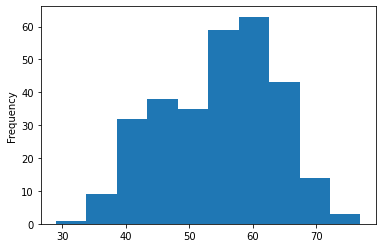

In [32]:
print(df['age'].describe(include='all'))
print(df['age'].plot.hist())

count    297.000000
mean     131.693603
std       17.762806
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


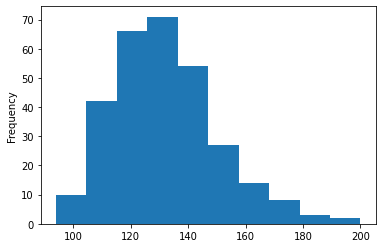

In [34]:
print(df['trestbps'].describe(include='all'))
print(df['trestbps'].plot.hist())

count    297.000000
mean     247.350168
std       51.997583
min      126.000000
25%      211.000000
50%      243.000000
75%      276.000000
max      564.000000
Name: chol, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


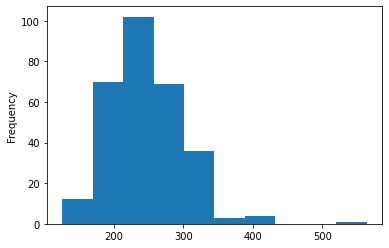

In [35]:
print(df['chol'].describe(include='all'))
print(df['chol'].plot.hist())

count    297.000000
mean     149.599327
std       22.941562
min       71.000000
25%      133.000000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


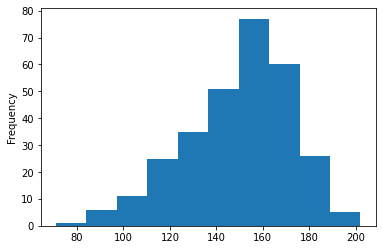

In [36]:
print(df['thalach'].describe(include='all'))
print(df['thalach'].plot.hist())

count    297.000000
mean       1.055556
std        1.166123
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


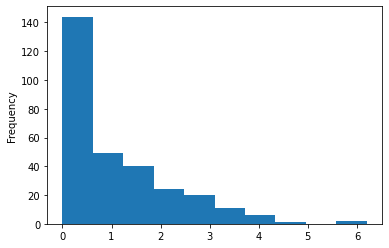

In [37]:
print(df['oldpeak'].describe(include='all'))
print(df['oldpeak'].plot.hist())

count    297.000000
mean       0.676768
std        0.938965
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


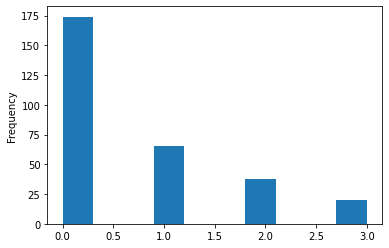

In [38]:
print(df['ca'].describe(include='all'))
print(df['ca'].plot.hist())

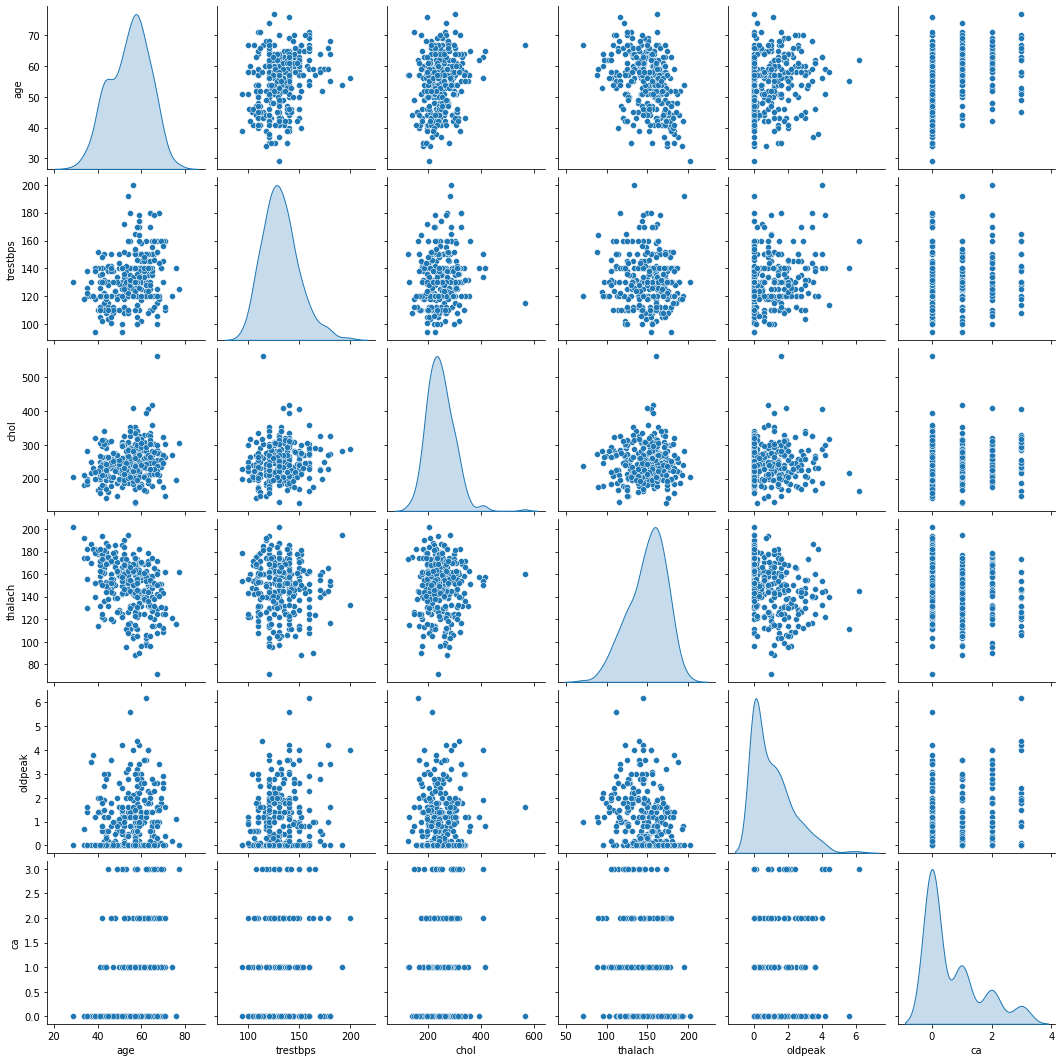

In [29]:
import seaborn as sns

sns.pairplot(df, diag_kind='kde')

ANALISIS DE DIAGRAMAS DE DISPERSION 2x2

In [52]:
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


Analizando los datos de las variables 2 a 2 vemos que hay muy pocas correlaciones claras entre variables. Vemos que ca(número de vasos sanguíneos principales) tienen una correlacion positiva de 0.36 con la edad y con la misma correlación inversa de la edad con el máximo numero de pulsaciones por minuto. Estas son las correlaciones más claras, lo que nos indica que no hay pares de variables que separen bien las clases.

Analizando el diagrama de dispersión, no conseguimos ver dos grupos claros entre ninguna de las variables.

ANALISIS DEL COEFICIENDE DE CORRELACION DE PEARSON

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

In [58]:
from sklearn.preprocessing import MinMaxScaler

df_copy = df.copy()
df_notarget = df_copy.drop(['target'], axis=1)
# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()
scaled_features = MinMaxScaler().fit_transform(df_notarget.values)


dic = {0 : 'Normal', 1: 'Enfermo', 2: 'Enfermo',  3: 'Enfermo', 4: 'Enfermo'}
# Creamos un nuevo dataframe con los datos escalados
df_scaled = pd.DataFrame(data=scaled_features, columns=df_notarget.columns)
df_scaled['target'] = df['target']
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,Normal
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,Enfermo
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,Enfermo
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,Normal
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.583333,0.0,1.000000,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,0.5,0.000000,1.00,Enfermo
293,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00,Enfermo
294,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00,Enfermo
295,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00,Normal


Necesitamos normalizar los datos escalándolos ya que el rango de algunas variables es muy distinto y podria afectar a la distribución de estas.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [65]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_validate
import numpy as np
RANDOM_STATE=84
c = df_scaled.copy()
only_input = c.drop(['target'], axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.583333,0.0,1.000000,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,0.5,0.000000,1.00
293,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
294,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
295,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00


In [66]:
train_accuracy_arr = []
test_accuracy_arr = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 12)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, only_input, df['target'], scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy_arr.append(np.mean(scores['train_score']))
    test_accuracy_arr.append(np.mean(scores['test_score']))
    
train_accuracy_arr, test_accuracy_arr

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265,
  0.9495052825758847,
  0.9708382246073006,
  0.9835527419084353,
  0.9932682095142267,
  0.9981329308513613,
  0.9996268656716417],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7641379310344828,
  0.763793103448276,
  0.7574712643678161,
  0.7575862068965518,
  0.747241379310345,
  0.7710344827586207,
  0.7609195402298851,
  0.7539080459770114])

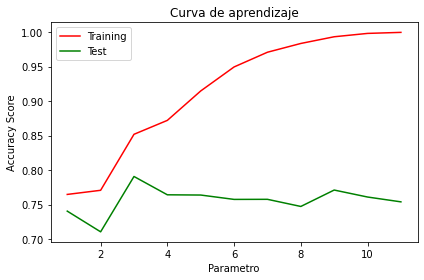

In [67]:
# Draw lines
plt.plot(max_depths, train_accuracy_arr, color="r",  label="Training")
plt.plot(max_depths, test_accuracy_arr, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

Para max_depth=3 obtenemos el mejor valor de exactitud para el conjunto de test. A partir de esa profundidad la métrica mejora para el conjunto de entrenamiento y empeora para el conjunto de test indicando que el clasificador está sobre-entrenado y generaliza peor, pero para esa profundidad el conjunto de entrenamiento no es lo suficientemente certero.

Para max_depth=9 obtenemos el segundo mejor valor para el conjunto de test antes de que empiece a empeorar de nuevo y nos proporciona un buen accuracy para el conjunto de entrenamiento, por lo que elegiremos esa profundidad como óptima.

Vemos que la precision del conjunto de entrenamiento es prácticamente máxima y bastante alta para el conjunto de test. Esto nos indica que los resultados van a ser bastante aproximados.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

In [68]:

clf = DecisionTreeClassifier(criterion="entropy", 
                             max_depth=9,       
                             min_samples_split=2)

only_input = df.drop(['target'], axis=1)
scores = cross_validate(clf, only_input, df['target'], scoring='accuracy', 
                        cv=10, return_train_score=True)

train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.9925205433506624, 0.7606896551724137)

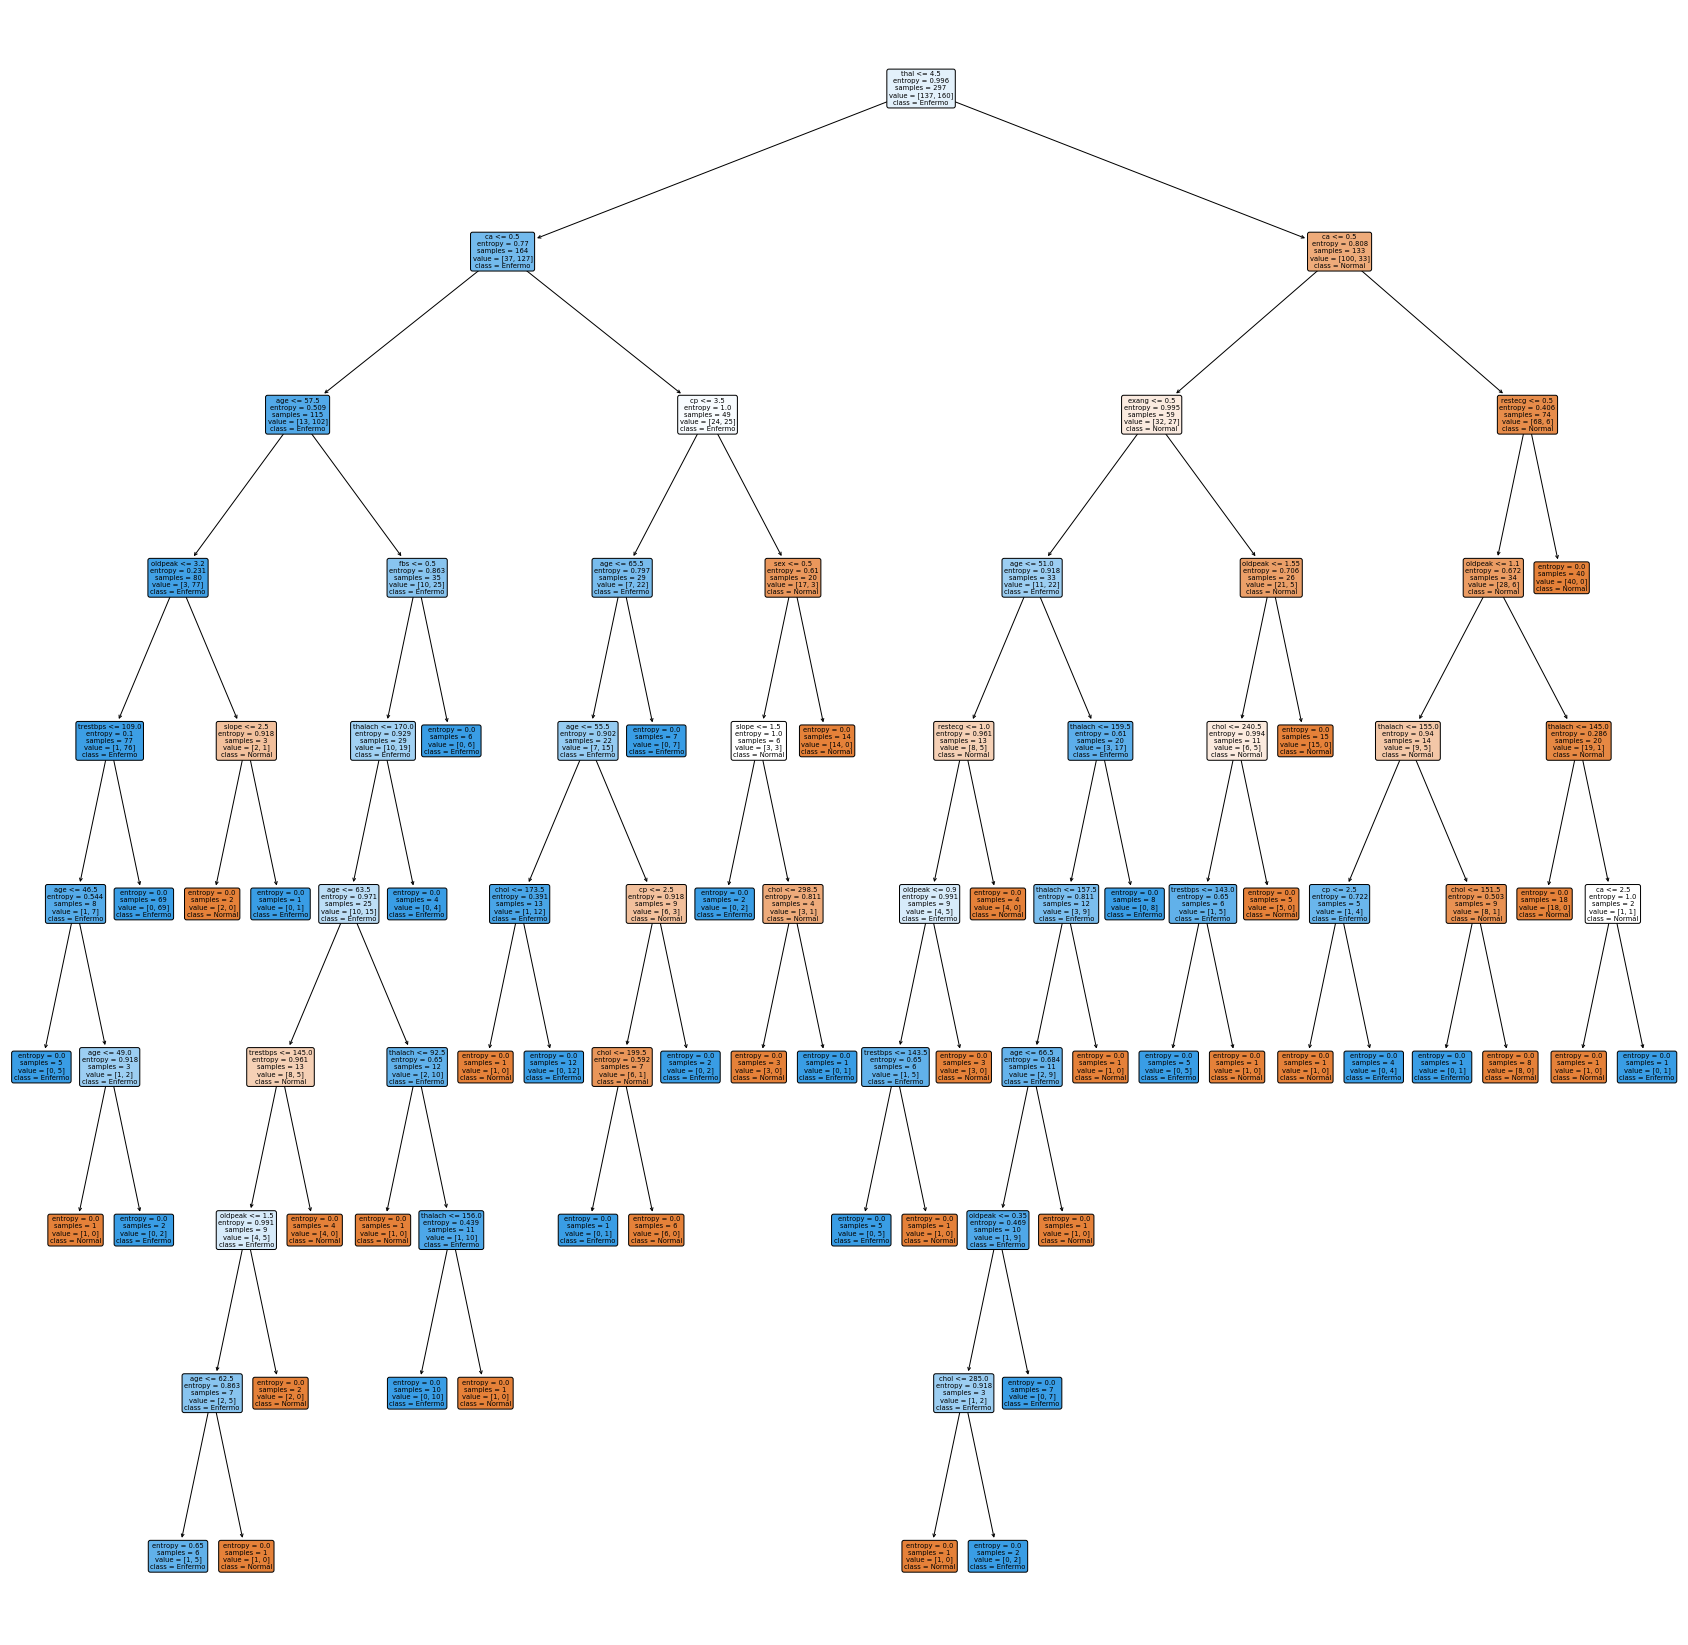

In [69]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

clf = clf.fit(only_input, df['target'])
plt.figure(figsize=(30,30))
plot_tree(clf, filled=True, feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], class_names=['Normal','Enfermo'], rounded=True)
plt.show()

Las variables más importantes son las que más arriba estan en el arbol ya que son las que mas deciden sobre las demas hojas del arbol. En este caso la más importante seria 'thal' y después 'ca' que es la del siguiente nivel.

Hay dos variables que no son usadas que son 'slope' y 'restecg'. Esto se debe a que no son relevantes para decidir en el resultado final ya que no seguira ningun tipo de correlación con tener o no la enfermedad.

La tasa de acierto seria de 99.3% como podemos ver en el resultado de train_accuracy.

El arbol construido es capaz de separar las clases dependiendo de muchas variables. Para cada hoja con la consecución de variables elige un resultado u otro dependiendo de su entropía. 

El nodo hoja en el que hay más confusión es el cuarto comenzando por la izquierda ya que su entropía es la mayor de todas. Hay 6 muestras de ejemplo y en 1 lo toma como normal y en 5 como enfermo. Es el nodo hoja donde más se equivoca.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [70]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, only_input, df['target'], scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.7776218918393841
Exhaustividad ponderada media:  0.764022988505747
F1 ponderado media:  0.7602925154761218


In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

predictions = cross_val_predict(clf, only_input, df['target'], cv=10)

cr = classification_report(df['target'],predictions, target_names=['Normal','Enfermo'])
print(cr)

              precision    recall  f1-score   support

      Normal       0.74      0.75      0.75       137
     Enfermo       0.78      0.78      0.78       160

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297



Vemos que nuestro clasificador no es fiable al 100%. Se equivoca más o menos en un 25% es decir 1 de cada 4.

In [73]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[103  34]
 [ 36 124]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

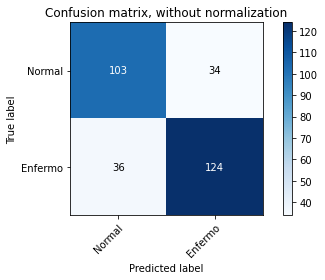

In [76]:
plot_confusion_matrix(df['target'], predictions, ['Normal','Enfermo'], normalize=False)

Como podemos ver en la matriz de confusión, de 137 que no estan enfermos, 34 los predice como enfermos y 103 como no enfermos.
Para los que están enfermos, de 160 enfermos, a 36 les pone como no enfermos y a 124 como enfermos. Vemos que en proporción el clasificador es más pesimista y pone a más gente sana como enferma que gente enferma como sana.

La decisión de usar este clasificador en un hospital real o no, es simple. Siempre. Tener un clasificador como ayuda para los medicos, siempre va a ayudar. Evidentemente no sería óptimo usar solo este clasificador para decir si tiene la enfermedad o no. El médico es el que debe decidir ya que este clasificador no tiene tantos datos como para ser fiable 100% pero si puede servir de mucha ayuda para respaldar las decisiones de un médico.

Utilizar un árbol de decisión para este tipo de problemas tiene ventajas y desventajas. Una de las principales ventajas es que podemos ver si alguna de las variables aparece siempre en un diagnóstico y si es común o no. Si una de las variables aparece la mitad de las veces en un diagnóstico y la mitad en otra, sabemos que esa variable no la podemos utilizar para decidir. De esta manera el árbol de decisión lo elige por nosotros lo que facilita la vida de mucha gente al no tener que contrastarlo y descartarlo por ellos mismos. El árbol elige las variables que mejor separan los diagnósticos en este caso.
La desventaja que pueden tener los árboles de decisión es que al haber tantas variables, se necesita una gran cantidad de datos que si no tenemos puede ser muy difícil poder predecir los diagnosticos en este caso.